# Pandemic Data Science | EDA - Mobility Dataset

---

## Goal

The goal of this analysis is to figure out the important features that determine the case counts in a given district

In [1]:
# # Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [7]:
mobility_data = pd.read_csv("../Datasets/mobility_2904_states_India.csv")
mobility_data

,state,retail_recreation,supermarket_pharmacy,parks,public_transport,workplaces,residential
0,Andaman and Nicobar Islands,3,0,-33,17,14,16
1,Andhra Pradesh,-38,16,-36,28,-27,18
2,Arunachal Pradesh,-29,11,11,-22,-26,7
3,Assam,-35,-7,-20,-27,-18,19
4,Bihar,-36,8,-13,-21,-33,18
5,Chandigarh,-55,-42,-61,-35,-36,16
6,Chhattisgarh,-75,-50,-54,-68,-61,35
7,Dadra and Nagar Haveli,-56,3,-58,-26,-26,19
8,Daman and Diu,-56,-18,-55,-39,-19,17
9,Delhi,-76,-49,-69,-69,-72,28


In [10]:
vacc_data = pd.read_csv('../final_datasets/state_vaccination_dataset.csv')
vacc_data.head()

,Unnamed: 0,state,tot_ind_registered,tot_sess_conducted,tot_sites,first_dose_administered,second_dose_administered,male_ind _vaccinated,female_Ind_vaccinated,trans_ind_vaccinated,tot_covaxin_administered,tot_covishield_administered,pop_aadhar,per_ind_reg,per_pop_vacc,rat_vacc_pop,Active,rat_indreg_act,rat_act_vacc
0,0,Andaman and Nicobar Islands,87865,3500,35,87865,9527,47711,40146,8,0,97392,387019,22.703020,22.703020,0.251647,19.0,0.000216,0.000216
1,1,Andhra Pradesh,4547972,84100,560,4547972,1130670,2313082,2234361,529,1035700,4642942,49145456,9.254105,9.254105,0.115548,83650.0,0.018393,0.018393
2,2,Arunachal Pradesh,163535,6100,43,163535,46800,92072,71392,71,0,210335,1229964,13.295918,13.295918,0.171009,547.0,0.003345,0.003345
3,3,Assam,1605126,94500,797,1605126,415395,886426,718504,196,380857,1639664,6755448,23.760467,23.760467,0.299095,80177.0,0.049951,0.049951
4,4,Bihar,5534535,364600,2201,5534535,902592,2823940,2709931,664,352127,6085000,102714667,5.388262,5.388262,0.062670,96471.0,0.017431,0.017431


In [12]:
act_pop_per = vacc_data['Active']*100/vacc_data['pop_aadhar']
mobility_data['act_pop_per'] = act_pop_per

In [13]:
mobility_data.head()

,state,retail_recreation,supermarket_pharmacy,parks,public_transport,workplaces,residential,act_pop_per
0,Andaman and Nicobar Islands,3,0,-33,17,14,16,0.004909
1,Andhra Pradesh,-38,16,-36,28,-27,18,0.170209
2,Arunachal Pradesh,-29,11,11,-22,-26,7,0.044473
3,Assam,-35,-7,-20,-27,-18,19,1.186849
4,Bihar,-36,8,-13,-21,-33,18,0.093921


In [35]:
state_wise_daily = pd.read_csv("../state_wise_daily.csv")
state_wise_daily.head()

,date,Date_YMD,Status,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,UN
0,14-Mar-20,2020-03-14,Confirmed,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


**Goal**: To get the percentage increase in number of confirmed cases in the last 15 days

In [48]:
# get only the confirmed cases
state_wise_daily = state_wise_daily.loc[state_wise_daily['Status'] == 'Confirmed']

# Remove DD column
state_wise_daily = state_wise_daily.drop(['DD'], axis=1)

In [52]:
# Get state names
state_names = list(state_wise_daily.columns)
state_names.remove('date')
state_names.remove('Date_YMD')
state_names.remove('Status')
state_names.remove('UN')

In [83]:
state_wise_daily.iloc[-8]

date                                         29-Apr-21
Date_YMD                                    2021-04-29
Status                                       Confirmed
Andaman and Nicobar Islands                         59
Andhra Pradesh                                   14792
Arunachal Pradesh                                  194
Assam                                             3079
Bihar                                            13089
Chandigarh                                         801
Chhattisgarh                                     15804
Dadra and Nagar Haveli and Daman and Diu           216
Delhi                                            24235
Goa                                               3019
Gujarat                                          14327
Haryana                                          13947
Himachal Pradesh                                  3040
Jammu and Kashmir                                 3474
Jharkhand                                         5961
Karnataka 

In [84]:
delta_act = []
for state in state_names:
    delta_act.append((list(state_wise_daily[state])[-15] - list(state_wise_daily[state])[-8])*100/list(state_wise_daily[state])[-8])
delta_act

[-37.28813559322034,
 -27.26473769605192,
 -43.29896907216495,
 -37.284832737901915,
 -12.224004889601956,
 -20.848938826466917,
 5.9858263730701085,
 66.20370370370371,
 7.980193934392408,
 -53.29579330904273,
 -8.529350177985622,
 -30.1498530149853,
 -41.64473684210526,
 -43.43696027633852,
 27.411508136218757,
 -26.350502512562816,
 -30.077447095086384,
 83.33333333333333,
 -8.227848101265822,
 -2.9619181946403383,
 1.2908296679212201,
 -72.61146496815287,
 -3.7433155080213902,
 -47.10144927536232,
 -70.7182320441989,
 -11.917690768791083,
 -12.032085561497325,
 -18.947055324211778,
 -16.219815855000288,
 -27.058823529411764,
 -29.306587696261943,
 -30.36027020265199,
 1.2048192771084338,
 -2.421376481312671,
 -36.04223324268117,
 -31.34517037292421]

In [85]:
delta_act_df = pd.DataFrame({
    'state':state_names,
    'delta_act':delta_act
})
delta_act_df

,state,delta_act
0,Andaman and Nicobar Islands,-37.288136
1,Andhra Pradesh,-27.264738
2,Arunachal Pradesh,-43.298969
3,Assam,-37.284833
4,Bihar,-12.224005
5,Chandigarh,-20.848939
6,Chhattisgarh,5.985826
7,Dadra and Nagar Haveli and Daman and Diu,66.203704
8,Delhi,7.980194
9,Goa,-53.295793


In [88]:
mobility_data = pd.merge(mobility_data, delta_act_df, on='state', how='inner')

<AxesSubplot:>

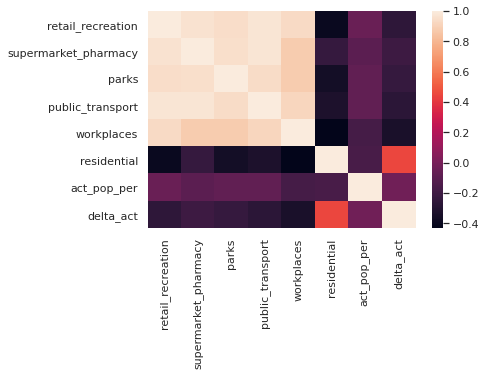

In [91]:
corr = mobility_data.corr()
sns.heatmap(corr)